# Residential Power Usage Prediction

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

#! pip install cloudmesh-common -U
from cloudmesh.common.StopWatch import StopWatch

# Misc
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 81kB 6.9MB/s 
     |████████████████████████████████| 133kB 19.6MB/s 
  Created wheel for python-hostlist: filename=python_hostlist-1.21-cp36-none-any.whl size=38932 sha256=a019956558b3b076acbce608939f254493ec5dae07a75b0dc4c522973e3bcced
  Stored in directory: /root/.cache/pip/wheels/0b/5b/55/ddcf52288f0b10f4564ca1b2531594ff7ccc65f487ba8dc437
Successfully built python-hostlist


In [3]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/BigData_Project/Data

/content/drive/My Drive/BigData_Project/Data


## Download datasets

In [5]:
#!pip install kaggle

In [6]:
if not os.path.exists('residential-power-usage-3years-data-timeseries.zip'):
  StopWatch.start("Data download")
  os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/BigData_Project" # put path for wherever you put it
  !mkdir ~/.kaggle
  !cp /content/drive/'My Drive'/BigData_Project/kaggle.json ~/.kaggle
  !chmod 600 ~/.kaggle/kaggle.json
  !kaggle datasets download -d srinuti/residential-power-usage-3years-data-timeseries
  StopWatch.stop("Data download")
  StopWatch.status("Data download", True)

  0% 0.00/227k [00:00<?, ?B/s]
100% 227k/227k [00:00<00:00, 31.0MB/s]


## Load datasets

In [7]:
data_path = os.getcwd()

In [8]:

unzippingReq = True #please modify this flag unzippingReq from False to True 
if unzippingReq: #please modify this code unzippingReq from False to True 
    StopWatch.start("Data load")
    file_name = data_path  + '/residential-power-usage-3years-data-timeseries.zip'
    zip_ref = zipfile.ZipFile(file_name, 'r')
    zip_ref.extractall(path=data_path)
    zip_ref.close()

In [9]:
if len(os.listdir()) > 1:
  power_usage = pd.read_csv('power_usage_2016_to_2020.csv')
  weather = pd.read_csv('weather_2016_2020_daily.csv')
if unzippingReq:
  StopWatch.stop("Data load")
  StopWatch.status("Data load", True)

## Data descriptive analysis

In [10]:
power_usage.head(25)

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday
5,2016-01-06 05:00:00,0.333,2,weekday
6,2016-01-06 06:00:00,0.462,2,weekday
7,2016-01-06 07:00:00,0.493,2,weekday
8,2016-01-06 08:00:00,0.325,2,weekday
9,2016-01-06 09:00:00,0.294,2,weekday


In [11]:
weather.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4


In [12]:
print(power_usage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB
None


In [13]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1552 non-null   object 
 1   Day          1552 non-null   int64  
 2   Temp_max     1552 non-null   int64  
 3   Temp_avg     1552 non-null   float64
 4   Temp_min     1552 non-null   int64  
 5   Dew_max      1552 non-null   int64  
 6   Dew_avg      1552 non-null   float64
 7   Dew_min      1552 non-null   int64  
 8   Hum_max      1552 non-null   int64  
 9   Hum_avg      1552 non-null   float64
 10  Hum_min      1552 non-null   int64  
 11  Wind_max     1552 non-null   int64  
 12  Wind_avg     1552 non-null   float64
 13  Wind_min     1552 non-null   int64  
 14  Press_max    1552 non-null   float64
 15  Press_avg    1552 non-null   float64
 16  Press_min    1552 non-null   float64
 17  Precipit     1552 non-null   float64
 18  day_of_week  1552 non-null   int64  
dtypes: flo

In [14]:
power_usage.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [15]:
power_usage.notes.unique()

array(['weekday', 'weekend', 'vacation', 'COVID_lockdown'], dtype=object)

## Data Preprocessing

### Change column name

In [16]:
StopWatch.start("Data preprocessing")

In [17]:
power_usage.rename(columns={'Value (kWh)' : 'Value'}, inplace=True)

### Change date format

The actual StartDate of data is from 2016-06-01(yyyy-mm-dd). In the dataset the dates are not properly formated. In the following steps the StartDate column is formated properly.

In [18]:
m = power_usage.shape[0]
power_usage_date = pd.Series(range(m), pd.period_range('2016-06-01 00:00:00', freq = '1H', periods = m))
power_usage['StartDate'] = power_usage_date.to_frame().index

In [19]:
m = weather.shape[0] 
weather_date = pd.Series(range(m), pd.period_range('2016-06-01', freq = '1D', periods = m))
weather['Date'] = weather_date.to_frame().index

### Merge datasets

For the purpose of merging Datasets we can split the StartDate to Date and Hour columns.

In [20]:
for idx, date in power_usage.iterrows():
    power_usage.loc[idx, 'Date'] = power_usage.StartDate[idx].strftime('%Y-%m-%d')
    power_usage.loc[idx, 'Hour'] = power_usage.StartDate[idx].strftime('%H:%M')

power_usage.drop(['StartDate'], inplace=True, axis = 1)


weather_date = []
for idx, date in weather.iterrows():
    weather_date.append(weather.Date[idx].strftime('%Y-%m-%d'))
weather.Date = weather_date

In [21]:
df_main  = power_usage.merge(weather,  on = ['Date', 'day_of_week'])

In [22]:
StopWatch.stop("Data preprocessing")
StopWatch.status("Data preprocessing", True)

In [23]:
print(f"Shape of main table is {df_main.shape}")
print(f"Shape of power_usage table is {power_usage.shape}")
print(f"Shape of weather table is {weather.shape}")

Shape of main table is (35952, 22)
Shape of power_usage table is (35952, 5)
Shape of weather table is (1552, 19)


## Exploratory Data Analysis

In [24]:
df_main.head()

,Value,day_of_week,notes,Date,Hour,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,1.057,2,weekday,2016-06-01,00:00,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
1,1.171,2,weekday,2016-06-01,01:00,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
2,0.560,2,weekday,2016-06-01,02:00,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
3,0.828,2,weekday,2016-06-01,03:00,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0
4,0.932,2,weekday,2016-06-01,04:00,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.0



For better use of data , we can split Date into year, month, day columns. Since day column is already in the dataframe, we might just add year and month column.

In [25]:
df_main['year'] = df_main.Date.str.split('-', expand=True)[0]
df_main['month'] = df_main.Date.str.split('-', expand=True)[1]
df_main.drop(columns = ['Date'], inplace = True)

Text(0.5, 1.0, 'Average power usage by type of the day')

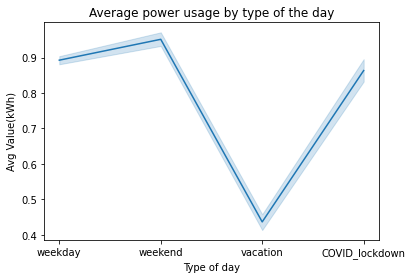

In [26]:
tod = sns.lineplot('notes', 'Value', data=df_main)
plt.xlabel('Type of day')
plt.ylabel('Avg Value(kWh)')
plt.title('Average power usage by type of the day')
#tod.get_figure().savefig("tod.png")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

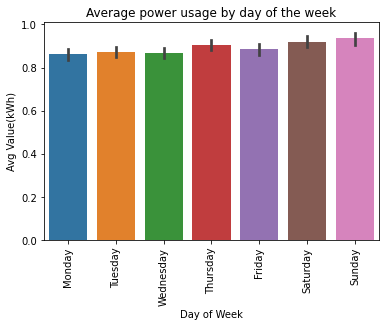

In [27]:
dow = sns.barplot('day_of_week', 'Value', data=df_main)
dow.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Avg Value(kWh)')
plt.title('Average power usage by day of the week')
plt.xticks(rotation = 90)
#dow.get_figure().savefig("dow.png")

Text(0, 0.5, 'Power usage(kWh)')

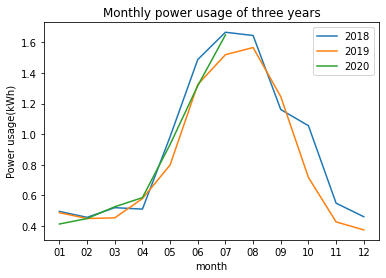

In [28]:
sns.lineplot(x = 'month', y = 'Value', data=df_main[df_main.year.astype(int) >= 2018], hue = 'year', ci = None)
plt.legend(labels = ['2018', '2019', '2020'])
plt.title('Monthly power usage of three years')
plt.ylabel('Power usage(kWh)')
#plt.savefig("monthly_power.png")

In [29]:
target_corr = df_main.corr()

Text(0.5, 1.0, 'Correlation matrix')

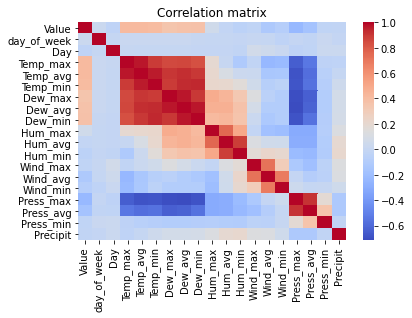

In [30]:
sns.heatmap(target_corr, cmap='coolwarm')
plt.title('Correlation matrix')
#plt.savefig("corr_plot", pad_inches=0.6)

We can see that features like temperature, dew and pressure has high correlation to our target feature. Also different temperatures and dew features are inter-correlated. Therefore, all the intercorrelated features except for temp_avg can be dropped during feature selection. 

In [31]:
target_corr['Value']

Value          1.000000
day_of_week    0.026342
Day           -0.034022
Temp_max       0.411861
Temp_avg       0.417369
Temp_min       0.408709
Dew_max        0.351552
Dew_avg        0.367533
Dew_min        0.373874
Hum_max        0.058227
Hum_avg       -0.012892
Hum_min       -0.043594
Wind_max      -0.028582
Wind_avg      -0.121607
Wind_min      -0.079303
Press_max     -0.223549
Press_avg     -0.168737
Press_min     -0.025829
Precipit      -0.017351
Name: Value, dtype: float64

In [32]:
drop_cols = ['Temp_max', 'Temp_min', 'Dew_avg', 'Dew_min', 'Dew_max', 'Press_avg', 'Press_min']

## Data Modelling

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

# CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

# metrics

from sklearn.metrics import mean_squared_error, r2_score

### Split data

In [34]:
X_train, X_test,y_train , y_test = train_test_split(df_main.drop(columns=['Value']), df_main.Value, test_size = .2, stratify= df_main.notes, random_state =42, shuffle=True)

In [35]:
print(f"Train data shape is {X_train.shape}")
print(f"Test data shape is {X_test.shape}")

Train data shape is (28761, 22)
Test data shape is (7191, 22)


In [36]:
df_main.columns

Index(['Value', 'day_of_week', 'notes', 'Hour', 'Day', 'Temp_max', 'Temp_avg',
       'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg',
       'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg',
       'Press_min', 'Precipit', 'year', 'month'],
      dtype='object')

### Pipelines

In [37]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [38]:
cat_features = ['day_of_week', 'notes', 'Hour', 'Day', 'year', 'month']
num_features = ['Temp_max', 'Temp_avg',
       'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg',
       'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg',
       'Press_min', 'Precipit']

In [39]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_features)),
        ('std_scaler', StandardScaler()),
    ])

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

# Union the transformed, scaled numeric and categorical features.
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [40]:
lin_reg = LinearRegression()
np.random.seed(42)

baseline_pipeline = Pipeline([
    ('preperation', data_prep_pipeline),
    ('baseline_linreg', lin_reg)
])

In [41]:
cvSplits = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

### Baseline linear regression model

In [42]:
StopWatch.start("Baseline Linear Regression")
baseline_pipeline.fit(X_train, y_train)
np.random.seed(42)

lin_scores = cross_val_score(baseline_pipeline, X_train, y_train, cv=cvSplits, scoring = 'neg_mean_squared_error')
                               
lin_score_train = np.sqrt(-lin_scores.mean())

# Time and score test predictions

lin_test_pred = baseline_pipeline.predict(X_test)

lin_score_test  = np.sqrt(mean_squared_error(y_test, lin_test_pred))
lin_r2_score = r2_score(y_test, lin_test_pred)

StopWatch.stop("Baseline Linear Regression")
StopWatch.status("Baseline Linear Regression", True)

In [43]:
results = pd.DataFrame(columns=["ExpID", 
              "Train RMSE","Test RMSE", "Test R2"])

In [44]:
results.loc[0] = ["Baseline Linear Regression", 
                  np.round(lin_score_train,4), np.round(lin_score_test,4), np.round(lin_r2_score, 4)]

pd.set_option('display.max_colwidth', None)
results

,ExpID,Train RMSE,Test RMSE,Test R2
0,Baseline Linear Regression,0.6783,0.6811,0.446


### Linear regression with predictors

In [45]:
classifiers = [
        ('Linear Regression', LinearRegression()),
        ('Gradient Boosting', GradientBoostingRegressor(warm_start=True, random_state=42)),
        ('XGBoost', XGBRegressor(random_state=42)),
        ('Light GBM', LGBMRegressor(random_state=42)),
    ]

In [46]:
#GradientBoostingRegressor().get_params().keys()

In [47]:
params_grid = {
        'Linear Regression': {
            'fit_intercept': [True, False],
        },
        'Gradient Boosting':  {
            'max_depth': [10, 20, 30],
            'max_features': [20, 50, 100],
            'validation_fraction': [0.2],
            'n_iter_no_change': [10],
            'tol': [0.01],
            'n_estimators':[20, 50, 100],
        },
        'XGBoost':  {
            'max_depth': [10, 20, 30],
            'n_estimators':[20, 50, 100],
            'learning_rate': [0.1, 0.01, 0.001]
        },
        'Light GBM':  {
            'max_depth': [10, 20, 30],
            'num_leaves': [5, 10, 15],
            'n_estimators':[20, 50, 100],
            'learning_rate': [0.1, 0.01, 0.001],
            'reg_alpha': [0.1, 0.01, 0.001],
            'reg_lambda': [0.1, 0.01, 0.001],
        },
    }

#### Feature selection

In [48]:
dropped_df = df_main.drop(columns=drop_cols).copy()
num_features = list(set(num_features) - set(drop_cols))
X_train, X_test,y_train , y_test = train_test_split(dropped_df.drop(columns=['Value']), dropped_df.Value, test_size = .2, stratify= dropped_df.notes, random_state =42, shuffle=True)

In [49]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_features)),
        ('std_scaler', StandardScaler()),
    ])

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
      ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

# Union the transformed, scaled numeric and categorical features.
data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [58]:
i = 1
for (name, classifier) in classifiers:
  StopWatch.start(name)
  parameters = params_grid[name].copy()

  params = {}
  for p in parameters.keys():
      pipe_key = 'predictor__'+str(p)
      params[pipe_key] = parameters[p] 

  pipe = Pipeline([('preperation', data_prep_pipeline),
    ('predictor', classifier)])
  
  print(f"********** Starting {name} modelling********")

  gridsearch_model = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs=-1, verbose=2)
  gridsearch_model.fit(X_train, y_train)

  best_scores = cross_val_score(gridsearch_model.best_estimator_, X_train, y_train, cv=cvSplits, scoring = 'neg_mean_squared_error')
                               
  best_score_train = -best_scores.mean()

  y_test_pred = gridsearch_model.best_estimator_.predict(X_test)

  best_score_test = mean_squared_error(y_test, y_test_pred)

  best_r2_test = r2_score(y_test, y_test_pred)

  StopWatch.stop(name)
  StopWatch.status(name, True)

  print(f"********** End of {name} modelling********")
  #best_scores_test  = baseline_pipeline.score(X_test, y_test)

  results.loc[i] = [name, 
                  np.round(best_score_train,4), np.round(best_score_test,4), np.round(best_r2_test, 4)]

  pd.set_option('display.max_colwidth', None)

  i += 1
  

********** Starting Linear Regression modelling********
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.9s finished


********** End of Linear Regression modelling********
********** Starting Gradient Boosting modelling********
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.9min finished


********** End of Gradient Boosting modelling********
********** Starting XGBoost modelling********
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [57]:
results

,ExpID,Train RMSE,Test RMSE,Test R2
0,Baseline Linear Regression,0.6783,0.6811,0.4460
1,Linear Regression,0.4611,0.4646,0.4452
2,Gradient Boosting,0.2879,0.2848,0.6599
3,XGBoost,0.2778,0.2735,0.6734
4,Light GBM,0.2896,0.2910,0.6525


In [56]:
StopWatch.benchmark()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           